# 직원 이직 여부

## 0.환경설정

### 1) 라이브러리 로딩

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [293]:
data = pd.read_csv('HR.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age : 해당 직원의 나이  
Attrition : 퇴직 여부 Target값 (종속변수)  
BusinessTravel : 출장의 빈도  
DailyRate : 일 대비 급여의 수준  
Department : 업무분야  
DistanceFromHome : 집과의 거리  
Education : 교육의 정도  
* 1 : ‘Below College’ : 대학 이하  
* 2 : ‘College’ : 전문대  
* 3 : ‘Bachelor’ : 학사  
* 4 : ‘Master’ : 석사  
* 5 : ‘Doctor’ : 박사  
EducationField : 전공  
EmployeeCount : 직원 숫자  
EmployeeNumber : 직원 ID  
EnvironmentSatisfaction : 업무 환경에 대한 만족도  
* 1 : ‘Low’  
* 2 : ‘Medium’  
* 3 : ‘High’  
* 4 : ‘Very High’  
Gender : 성별  
HourlyRate : 시간 대비 급여의 수준  
JobInvolvement : 업무 참여도  
* 1 : ‘Low’  
* 2 : ‘Medium’  
* 3 : ‘High’  
* 4 : ‘Very High’  
JobLevel : 업무의 수준   
JobRole : 업무 종류  
JobSatisfaction : 업무 만족도  
* 1 : ‘Low’  
* 2 : ‘Medium’  
* 3 : ‘High’  
* 4 : ‘Very High’  
MaritalStatus : 결혼 여부  
MonthlyIncome : 월 소득  
MonthlyRate : 월 대비 급여 수준  
NumCompaniesWorked : 일한 회사의 수  
Over18 : 18세 이상  
OverTime : 규정외 노동시간  
PercentSalaryHike : 급여의 증가분 백분율  
PerformanceRating : 업무 성과  
* 1 : ‘Low’  
* 2 : ‘Good’  
* 3 : ‘Excellent’  
* 4 : ‘Outstanding’  
RelationshipSatisfaction : 대인관계 만족도  
* 1 : ‘Low’  
* 2 : ‘Medium’  
* 3 : ‘High’  
* 4 : ‘Very High’  
StandardHours : 표준 시간  
StockOptionLevel : 스톡옵션 정도  
TotalWorkingYears : 경력 기간  
TrainingTimesLastYear : 교육 시간  
WorkLifeBalance : 일과 생활의 균형 정도  
* 1 : ‘Bad’  
* 2 : ‘Good’  
* 3 : ‘Better’  
* 4 : ‘Best’  
YearsAtCompany : 근속 연수  
YearsInCurrentRole : 현재 역할의 년수  
YearsSinceLastPromotion : 마지막 프로모션  
YearsWithCurrManager : 현재 관리자와 함께 보낸 시간  

In [416]:
data.loc[data['Attrition']=='Yes','Attrition']=1
data.loc[data['Attrition']=='No','Attrition']=0

* 불필요한 변수 제거

In [295]:
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

변수 쉽게 이해하기 위해 1,2,3,4를 각각의 이름으로 바꾸고 문자형으로 변경

In [296]:
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
data.replace({'Education': change_dict}, inplace=True)
data['Education'].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [297]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
data['EnvironmentSatisfaction'].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [298]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobInvolvement': change_dict}, inplace=True)
data['JobInvolvement'].unique()

array(['High', 'Medium', 'Very High', 'Low'], dtype=object)

In [299]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobSatisfaction': change_dict}, inplace=True)
data['JobSatisfaction'].unique()

array(['Very High', 'Medium', 'High', 'Low'], dtype=object)

In [300]:
change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
data.replace({'PerformanceRating': change_dict}, inplace=True)
data['PerformanceRating'].unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [301]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
data['RelationshipSatisfaction'].unique()

array(['Low', 'Very High', 'Medium', 'High'], dtype=object)

In [302]:
change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)
data['WorkLifeBalance'].unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

In [303]:
data = data.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [304]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## 1.가설수립

* 집과 회사의 거리가 먼 사람들이 퇴사를 많이 할 것이다.
* 월급여가 낮은 사람이 퇴사를 많이 할 것이다.
* 업무환경이 안좋은 사람이 퇴사를 많이 할것이다.
* 워라벨이 안좋은 사람이 퇴사를 많이 할 것이다.
* 근무부서에 따라 퇴사율이 다를것이다.
* 초기 경력자들이 퇴사를 많이 할 것이다.

## 2.단변량 분석

1) Age

In [305]:
var='Age'

① 변수의 비즈니스 의미

해당 직원의 나이

② 기초통계량 

In [306]:
data[var].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

③ 분포 

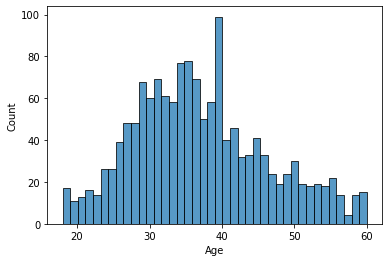

In [307]:
sns.histplot(data[var],bins=40)
plt.show()

2) Attrition

In [308]:
var='Attrition'

① 변수의 비즈니스 의미

퇴직 여부 Target값

② 기초통계량 

In [309]:
data[var].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


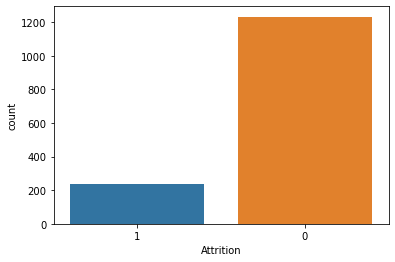

In [310]:
sns.countplot(data[var])
plt.show()

3) BusinessTravel

In [311]:
var='BusinessTravel'

① 변수의 비즈니스 의미

출장의 빈도

② 기초통계량 

In [312]:
data[var].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


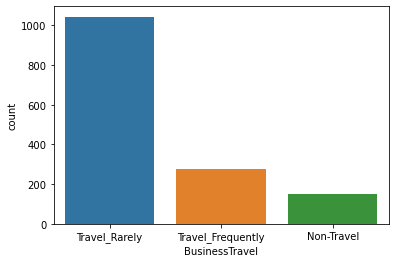

In [313]:
sns.countplot(data[var])
plt.show()

4) DailyRate

In [314]:
var='DailyRate'

① 변수의 비즈니스 의미

일 대비 급여의 수준

② 기초통계량 

In [315]:
data[var].describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

③ 분포 

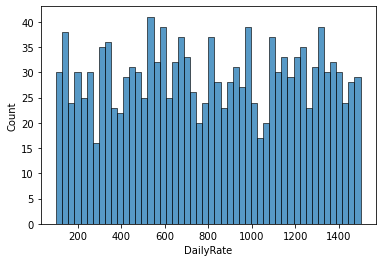

In [316]:
sns.histplot(data[var],bins=50)
plt.show()

5) Department

In [317]:
var='Department'

① 변수의 비즈니스 의미

업무분야

② 기초통계량 

In [318]:
data[var].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


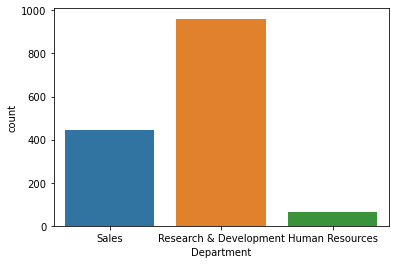

In [319]:
sns.countplot(data[var])
plt.show()

6) DistanceFromHome

In [320]:
var='DistanceFromHome'

① 변수의 비즈니스 의미

집과의 거리

② 기초통계량 

In [321]:
data[var].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

③ 분포 

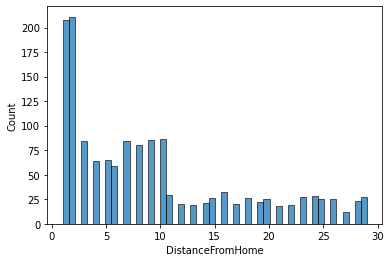

In [322]:
sns.histplot(data[var],bins=50)
plt.show()

7) Education

In [323]:
var='Education'

① 변수의 비즈니스 의미

교육의 정도
*	1 : ‘Below College’ : 대학 이하	
*	2 : ‘College’ : 전문대			
*	3 : ‘Bachelor’ : 학사
*	4 : ‘Master’ : 석사
*	5 : ‘Doctor’ : 박사

② 기초통계량 

In [324]:
data[var].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

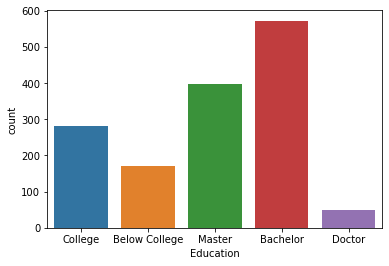

In [325]:
sns.countplot(data[var])

8) EducationField

In [326]:
var='EducationField'

① 변수의 비즈니스 의미

전공

② 기초통계량 

In [327]:
data[var].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EducationField', ylabel='count'>

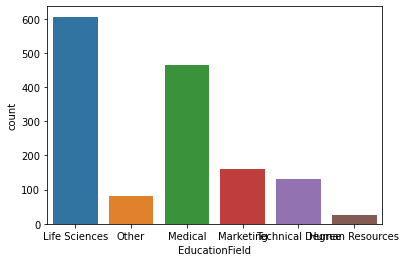

In [328]:
sns.countplot(data[var])

9) EnvironmentSatisfaction

In [329]:
var='EnvironmentSatisfaction'

① 변수의 비즈니스 의미

업무 환경에 대한 만족도

② 기초통계량 

In [330]:
data[var].value_counts()

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

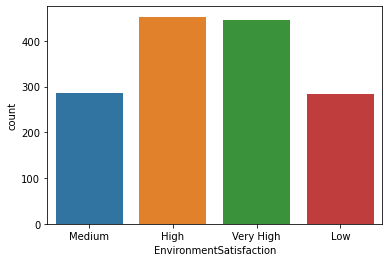

In [331]:
sns.countplot(data[var])

10) Gender

In [332]:
var='Gender'

① 변수의 비즈니스 의미

성별

② 기초통계량 

In [333]:
data[var].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

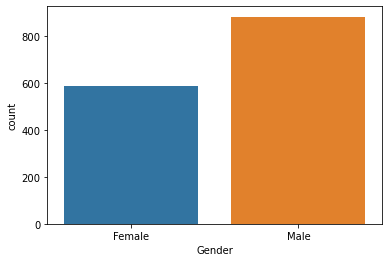

In [334]:
sns.countplot(data[var])

11) HourlyRate

In [335]:
var='HourlyRate'

① 변수의 비즈니스 의미

시간 대비 급여의 수준

② 기초통계량 

In [336]:
data[var].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

③ 분포 

<AxesSubplot:xlabel='HourlyRate', ylabel='Count'>

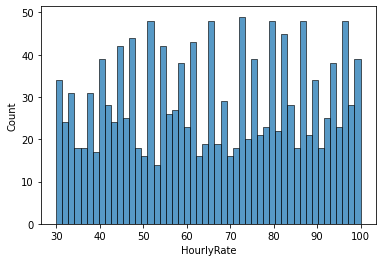

In [337]:
sns.histplot(data[var],bins=50)

12) JobInvolvement

In [338]:
var='JobInvolvement'

① 변수의 비즈니스 의미

업무 참여도

② 기초통계량 

In [339]:
data[var].value_counts()

High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

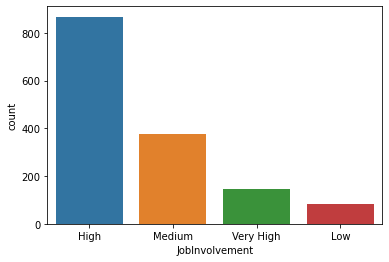

In [340]:
sns.countplot(data[var])

13) JobLevel

In [341]:
var='JobLevel'

① 변수의 비즈니스 의미

업무의 수준

② 기초통계량 

In [342]:
data[var].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

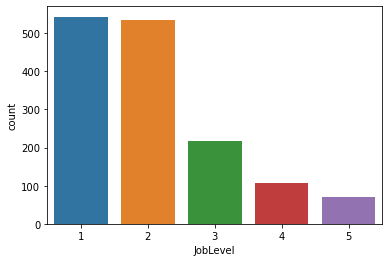

In [343]:
sns.countplot(data[var])

14) JobRole

In [344]:
var='JobRole'

① 변수의 비즈니스 의미

업무 종류

② 기초통계량 

In [345]:
data[var].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobRole', ylabel='count'>

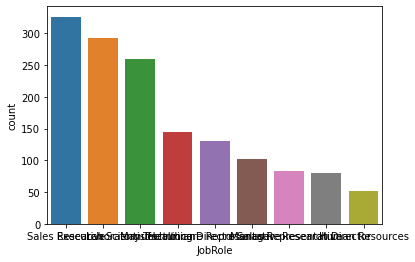

In [346]:
sns.countplot(data[var])

15) JobSatisfaction

In [347]:
var='JobSatisfaction'

① 변수의 비즈니스 의미

업무 만족도

② 기초통계량 

In [348]:
data[var].value_counts()

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

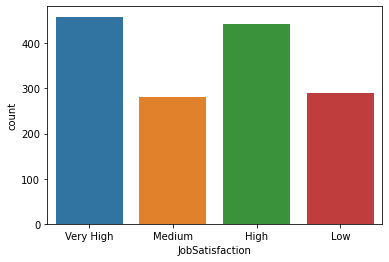

In [349]:
sns.countplot(data[var])

16) MaritalStatus

In [350]:
var='MaritalStatus'

① 변수의 비즈니스 의미

결혼 여부

② 기초통계량 

In [351]:
data[var].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

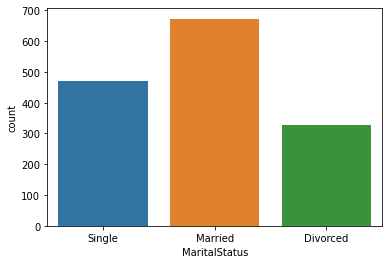

In [352]:
sns.countplot(data[var])

17) MonthlyIncome

In [353]:
var='MonthlyIncome'

① 변수의 비즈니스 의미

월 소득

② 기초통계량 

In [354]:
data[var].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

③ 분포 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

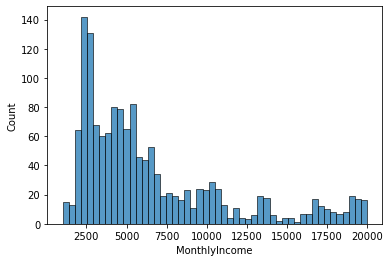

In [355]:
sns.histplot(data[var],bins=50)

18) MonthlyRate

In [356]:
var='MonthlyRate'

① 변수의 비즈니스 의미

월 대비 급여 수준

② 기초통계량 

In [357]:
data[var].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

③ 분포 

<AxesSubplot:xlabel='MonthlyRate', ylabel='Count'>

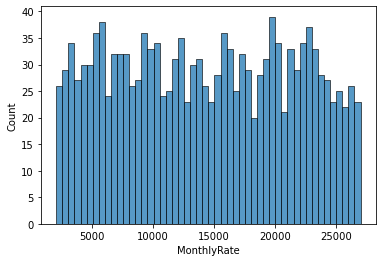

In [358]:
sns.histplot(data[var],bins=50)

19) NumCompaniesWorked

In [359]:
var='NumCompaniesWorked'

① 변수의 비즈니스 의미

일한 회사의 수

② 기초통계량 

In [360]:
data[var].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

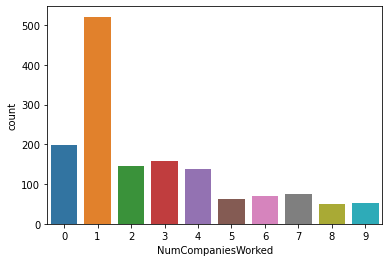

In [361]:
sns.countplot(data[var])

20) OverTime

In [362]:
var='OverTime'

① 변수의 비즈니스 의미

규정외 노동시간

② 기초통계량 

In [363]:
data[var].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverTime', ylabel='count'>

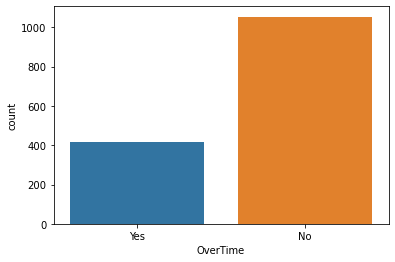

In [364]:
sns.countplot(data[var])

21) PercentSalaryHike

In [365]:
var='PercentSalaryHike'

① 변수의 비즈니스 의미

급여의 증가분 백분율

② 기초통계량 

In [366]:
data[var].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

③ 분포 

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Count'>

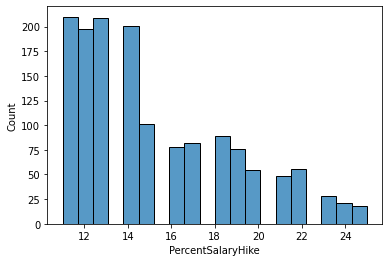

In [367]:
sns.histplot(data[var],bins=20)

22) PerformanceRating

In [368]:
var='PerformanceRating'

① 변수의 비즈니스 의미

업무 성과

② 기초통계량 

In [369]:
data[var].value_counts()

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

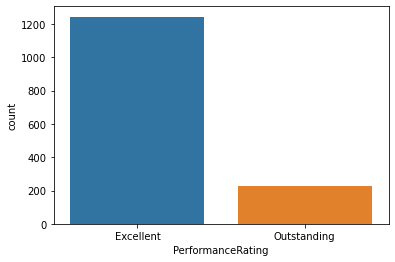

In [370]:
sns.countplot(data[var])

23) RelationshipSatisfaction

In [371]:
var='RelationshipSatisfaction'

① 변수의 비즈니스 의미

대인관계 만족도

② 기초통계량 

In [372]:
data[var].value_counts()

High         459
Very High    432
Medium       303
Low          276
Name: RelationshipSatisfaction, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

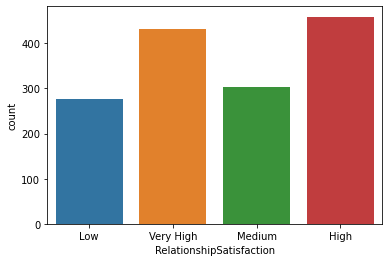

In [373]:
sns.countplot(data[var])

24) StockOptionLevel

In [374]:
var='StockOptionLevel'

① 변수의 비즈니스 의미

스톡옵션 정도

② 기초통계량 

In [375]:
data[var].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

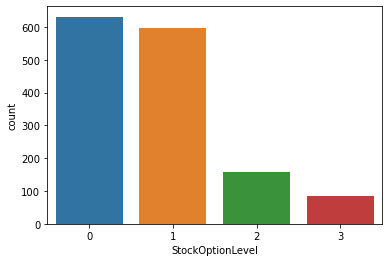

In [376]:
sns.countplot(data[var])

25) TotalWorkingYears

In [377]:
var='TotalWorkingYears'

① 변수의 비즈니스 의미

경력 기간

② 기초통계량 

In [378]:
data[var].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

③ 분포 

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

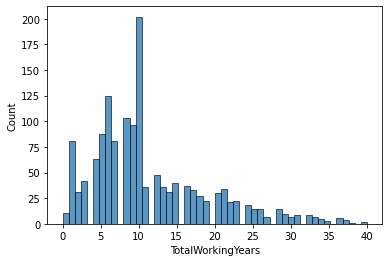

In [379]:
sns.histplot(data[var],bins=50)

26) TrainingTimesLastYear

In [380]:
var='TrainingTimesLastYear'

① 변수의 비즈니스 의미

교육 시간

② 기초통계량 

In [381]:
data[var].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

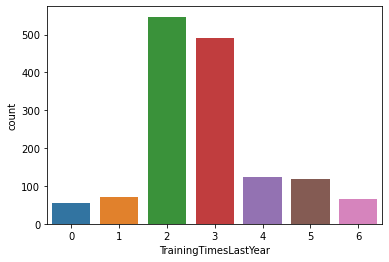

In [382]:
sns.countplot(data[var])

27) WorkLifeBalance

In [383]:
var='WorkLifeBalance'

① 변수의 비즈니스 의미

일과 생활의 균형 정도

② 기초통계량 

In [384]:
data[var].value_counts()

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

③ 분포 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

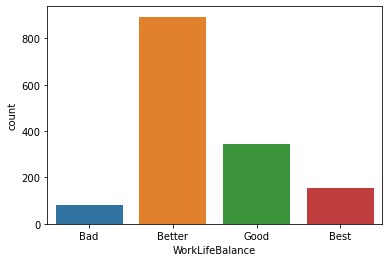

In [385]:
sns.countplot(data[var])

28) YearsAtCompany

In [386]:
var='YearsAtCompany'

① 변수의 비즈니스 의미

근속 연수

② 기초통계량 

In [387]:
data[var].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

③ 분포 

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

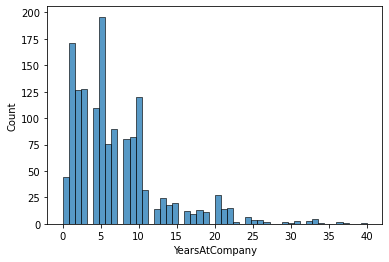

In [388]:
sns.histplot(data[var],bins=50)

29) YearsInCurrentRole

In [389]:
var='YearsInCurrentRole'

① 변수의 비즈니스 의미

현재 역할의 년수

② 기초통계량 

In [390]:
data[var].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

③ 분포 

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

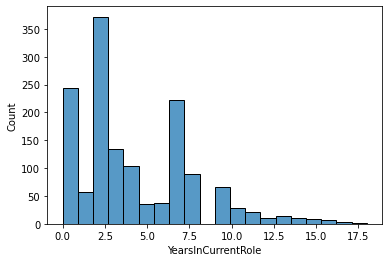

In [391]:
sns.histplot(data[var],bins=20)

30)YearsSinceLastPromotion

In [392]:
var='YearsSinceLastPromotion'

① 변수의 비즈니스 의미

마지막 프로모션

② 기초통계량 

In [393]:
data[var].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

③ 분포 

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

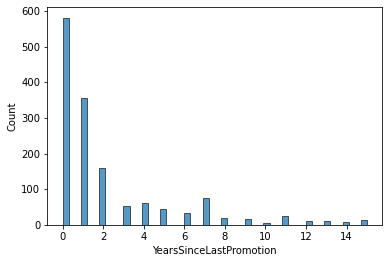

In [394]:
sns.histplot(data[var],bins=50)

31) YearsWithCurrManager

In [395]:
var='YearsWithCurrManager'

① 변수의 비즈니스 의미

현재 관리자와 함께 보낸 시간

② 기초통계량 

In [396]:
data[var].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

③ 분포 

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

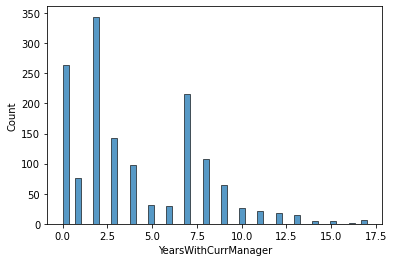

In [397]:
sns.histplot(data[var],bins=50)

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

1) DistanceFromHome -> Attrition 수치,범주

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

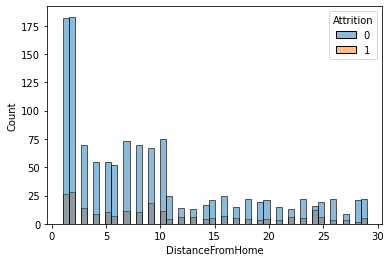

In [447]:
sns.histplot(x='DistanceFromHome',data=data,hue='Attrition',bins=50)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

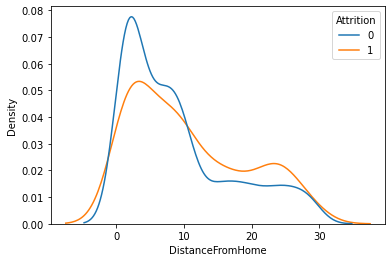

In [432]:
sns.kdeplot(x='DistanceFromHome',data=data,hue='Attrition',common_norm=False)

In [450]:
data['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

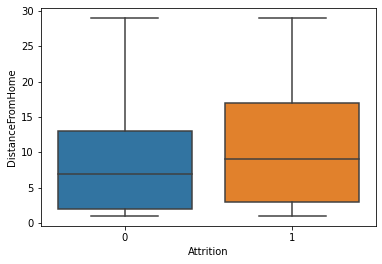

In [451]:
sns.boxplot(x='Attrition',y='DistanceFromHome',data=data)

In [423]:
data=data.astype({'Attrition':'int'})

In [424]:
model=sm.Logit(data['Attrition'],data['DistanceFromHome'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.565648
         Iterations 6
DistanceFromHome    9.138963e-55
dtype: float64


2) MonthlyRate -> Attrition 수치,범주

<AxesSubplot:xlabel='MonthlyRate', ylabel='Count'>

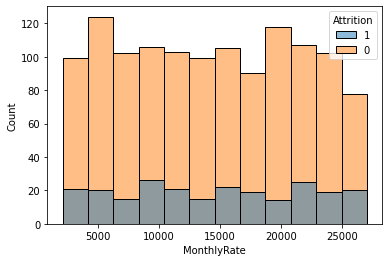

In [401]:
sns.histplot(x='MonthlyRate',data=data,hue='Attrition')

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

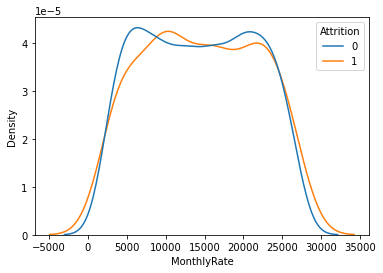

In [448]:
sns.kdeplot(x='MonthlyRate',data=data,hue='Attrition',common_norm=False)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

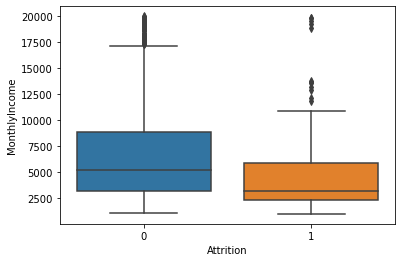

In [449]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=data)

In [407]:
data['MonthlyRate'].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

In [428]:
model=sm.Logit(data['Attrition'],data['MonthlyRate'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.488423
         Iterations 5
MonthlyRate    9.969919e-90
dtype: float64


3) EnvironmentSatisfaction -> Attrition 범주,범주

<AxesSubplot:xlabel='EnvironmentSatisfaction'>

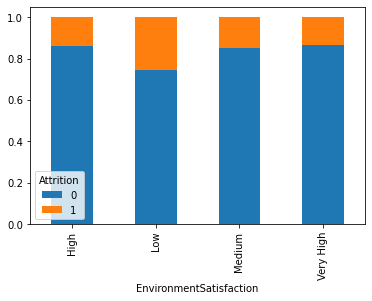

In [279]:
temp=pd.crosstab(data['EnvironmentSatisfaction'],data['Attrition'],normalize = 'index')
temp.plot.bar(stacked=True)

In [280]:
table=pd.crosstab(data['EnvironmentSatisfaction'],data['Attrition'])
result=spst.chi2_contingency(table)
print('pvalue',result[1])

pvalue 5.1234689062894327e-05


4) WorkLifeBalance-> Attrition 범주,범주

<AxesSubplot:xlabel='WorkLifeBalance'>

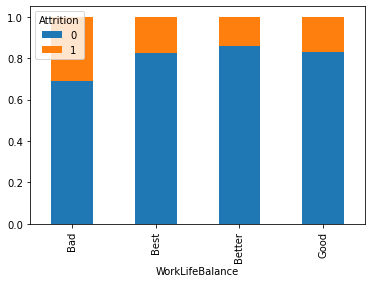

In [281]:
temp=pd.crosstab(data['WorkLifeBalance'],data['Attrition'],normalize = 'index')
temp.plot.bar(stacked=True)

In [282]:
table=pd.crosstab(data['WorkLifeBalance'],data['Attrition'])
result=spst.chi2_contingency(table)
print('pvalue',result[1])

pvalue 0.0009725698845348824


5) JobRole -> Attrition 범주, 범주

<AxesSubplot:xlabel='JobRole'>

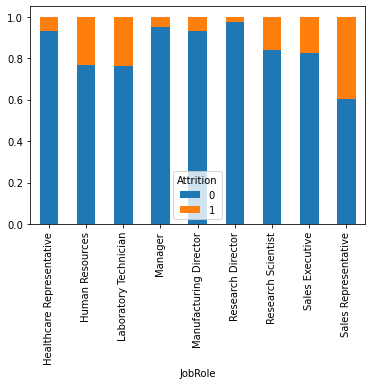

In [283]:
temp=pd.crosstab(data['JobRole'],data['Attrition'],normalize = 'index')
temp.plot.bar(stacked=True)

In [284]:
table=pd.crosstab(data['JobRole'],data['Attrition'])
result=spst.chi2_contingency(table)
print('pvalue',result[1])

pvalue 2.752481638050657e-15


6) TotalWorkingYears -> Attrition 수치,범주

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

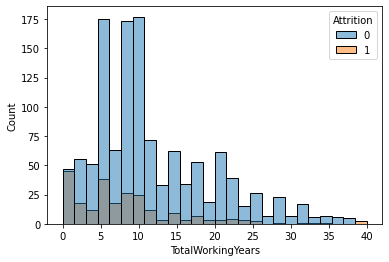

In [429]:
sns.histplot(x='TotalWorkingYears',data=data,hue='Attrition')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

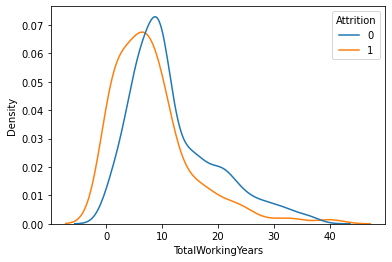

In [452]:
sns.kdeplot(x='TotalWorkingYears',data=data,hue='Attrition',common_norm=False)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

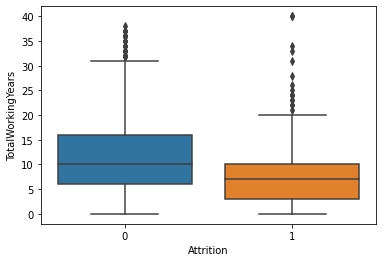

In [454]:
sns.boxplot(x='Attrition',y='TotalWorkingYears',data=data)

In [435]:
model=sm.Logit(data['Attrition'],data['TotalWorkingYears'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.440952
         Iterations 6
TotalWorkingYears    3.646513e-86
dtype: float64


* 집과 회사의 거리가 먼 사람들이 퇴사를 많이 할 것이다.- 맞음
* 월급여가 낮은 사람이 퇴사를 많이 할 것이다. - 맞음
* 업무환경이 안좋은 사람이 퇴사를 많이 할것이다. - 맞음
* 워라벨이 안좋은 사람이 퇴사를 많이 할 것이다. - 애매...., 좋아도 퇴사함
* 근무부서에 따라 퇴사율이 다를것이다. - 다르긴한데 추가분석 필요함
* 초기 경력자들이 퇴사를 많이 할 것이다. - 맞음

## 4.관계 정리

### 1) 강한관계의 변수

### 2) 약한관계의 변수

### 3) 관계 없음